In [70]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Parametros

YIELD_STRENGTH = 585000000 #Steel 9840 (Pascals N/M^2)
SAFETY_GOAL = 2.0 #Factor de seguirdad objetivo
MASS_90 = 0.033  
MASS_110V1 = 0.088
MASS_110V2 = 0.064


In [75]:
def global_procesing (folder_path, load_case):
    col_node= 'Node'
    col_von= 'VON (N/m^2)'
    col_ures = 'URES (mm)'

    df_v = pd.read_csv(f"{folder_path}/GlobalExtreme_VonMises.csv", skiprows = 4 )
    df_d = pd.read_csv(f"{folder_path}/GlobalExtreme_Displacement.csv", skiprows = 4 )

    print(df_d.columns.tolist())

    max_stress= df_v[col_von].max()
    max_displ= df_d[col_ures].max()
    fos_min = YIELD_STRENGTH / max_stress

    return {
        'Max_Stress_MPa': max_stress / 1e6,
        'Max_Displ_mm': max_displ, 
        'FOS_Min':round(fos_min,2),
        'Status': 'Passed' if fos_min >= SAFETY_GOAL else 'Failed'
    }
def path_processing(folder_path, archive_name, tipo='Stress'):
    
    df = pd.read_csv(f"{folder_path}/{archive_name}.csv", skiprows=9)
    df.columns = df.columns.str.strip()
    df_clean = df.iloc[:, [0, 1]].copy()
    df_clean.columns = ['Position', 'Value']
    
    return df_clean

In [81]:
ruta_90_tension = r'C:\Users\galoa\OneDrive\Escritorio\Quantum\AdaptaciónDirección\90mm\Tension'
ruta_90_compresion = r'C:\Users\galoa\OneDrive\Escritorio\Quantum\AdaptaciónDirección\90mm\Compresion'


# Extracción de los datos Modelo 1
summary_90t= global_procesing(ruta_90_tension, 'Tension')
#print(f"Resultados 90mm Tensión : {summary_90t}")
summary_90c= global_procesing(ruta_90_compresion, 'Compresion')
#print(f"Resultados 90mm Compresión : {summary_90c}")

path_bearing_90t_von = path_processing(ruta_90_tension, 'InnerBearingPathPlot_VonMises','Stress')
path_bearing_90c_von = path_processing(ruta_90_compresion, 'InnerBearingPathPlot_VonMises','Stress')

path_bearing_90t_disp = path_processing(ruta_90_tension, 'InnerBearingPathPlot_Displacement','Disp')
path_bearing_90c_disp = path_processing(ruta_90_compresion, 'InnerBearingPathPlot_Displacement','Disp')

lateral_face_90t_von = path_processing(ruta_90_tension, 'LateralFacePath_VonMises','Stress')
lateral_face_90c_von = path_processing(ruta_90_compresion, 'LateralFacePath_VonMises','Stress')

lateral_face_90t_disp = path_processing(ruta_90_tension, 'LateralFacePath_Displacement','Disp')
lateral_face_90c_disp = path_processing(ruta_90_compresion, 'LateralFacePath_Displacement','Disp')


# Extracción de los datos Modelo 2

ruta_110V1_tension = r'C:\Users\galoa\OneDrive\Escritorio\Quantum\AdaptaciónDirección\110mm_V1\Tension'
ruta_110V1_compresion = r'C:\Users\galoa\OneDrive\Escritorio\Quantum\AdaptaciónDirección\110mm_V1\Compresion'

summary_110V1t= global_procesing(ruta_110V1_tension, 'Tension')
#print(f"Resultados 90mm Tensión : {summary_110V1t}")
summary_110V1c= global_procesing(ruta_110V1_compresion, 'Compresion')
#print(f"Resultados 90mm Compresión : {summary_110V1c}")

path_bearing_110V1t_von = path_processing(ruta_110V1_tension, 'InnerBearingPathPlot_VonMises','Stress')
path_bearing_110V1c_von = path_processing(ruta_110V1_compresion, 'InnerBearingPathPlot_VonMises','Stress')

path_bearing_110V1t_disp = path_processing(ruta_110V1_tension, 'InnerBearingPathPlot_Displacement','Disp')
path_bearing_110V1c_disp = path_processing(ruta_110V1_compresion, 'InnerBearingPathPlot_Displacement','Disp')

lateral_face_110V1t_von = path_processing(ruta_110V1_tension, 'LateralFacePath_VonMises','Stress')
lateral_face_110V1c_von = path_processing(ruta_110V1_compresion, 'LateralFacePath_VonMises','Stress')

lateral_face_110V1t_disp = path_processing(ruta_110V1_tension, 'LateralFacePath_Displacement','Disp')
lateral_face_110V1c_disp = path_processing(ruta_110V1_compresion, 'LateralFacePath_Displacement','Disp')


# Extracción de los datos Modelo 3

ruta_110V2_tension = r'C:\Users\galoa\OneDrive\Escritorio\Quantum\AdaptaciónDirección\110mm_V2\Tension'
ruta_110V2_compresion = r'C:\Users\galoa\OneDrive\Escritorio\Quantum\AdaptaciónDirección\110mm_V2\Compresion'

summary_110V2t= global_procesing(ruta_110V2_tension, 'Tension')
#print(f"Resultados 90mm Tensión : {summary_110V2t}")
summary_110V2c= global_procesing(ruta_110V2_compresion, 'Compresion')
#print(f"Resultados 90mm Compresión : {summary_110V2c}")

path_bearing_110V2t_von = path_processing(ruta_110V2_tension, 'InnerBearingPathPlot_VonMises','Stress')
path_bearing_110V2c_von = path_processing(ruta_110V2_compresion, 'InnerBearingPathPlot_VonMises','Stress')

path_bearing_110V2t_disp = path_processing(ruta_110V2_tension, 'InnerBearingPathPlot_Displacement','Disp')
path_bearing_110V2c_disp = path_processing(ruta_110V2_compresion, 'InnerBearingPathPlot_Displacement','Disp')

lateral_face_110V2t_von = path_processing(ruta_110V2_tension, 'LateralFacePath_VonMises','Stress')
lateral_face_110V2c_von = path_processing(ruta_110V2_compresion, 'LateralFacePath_VonMises','Stress')

lateral_face_110V2t_disp = path_processing(ruta_110V2_tension, 'LateralFacePath_Displacement','Disp')
lateral_face_110V2c_disp = path_processing(ruta_110V2_compresion, 'LateralFacePath_Displacement','Disp')


['Node  ', 'X (mm)  ', 'Y (mm)  ', 'Z (mm)  ', 'URES (mm)']
['Node  ', 'X (mm)  ', 'Y (mm)  ', 'Z (mm)  ', 'URES (mm)']
['Node  ', 'X (mm)  ', 'Y (mm)  ', 'Z (mm)  ', 'URES (mm)']
['Node  ', 'X (mm)  ', 'Y (mm)  ', 'Z (mm)  ', 'URES (mm)']
['Node  ', 'X (mm)  ', 'Y (mm)  ', 'Z (mm)  ', 'URES (mm)']
['Node  ', 'X (mm)  ', 'Y (mm)  ', 'Z (mm)  ', 'URES (mm)']


MATRIZ DE DECISIÓN ESTRUCTURAL


,ID,Max_Stress_MPa,FOS_Min,Masa_kg,Eficiencia_FOS_kg,Status
0,90mm_T,242.022,2.42,0.033,73.333333,Passed
1,90mm_C,232.744,2.51,0.033,76.060606,Passed
2,110mmV1_T,574.918,1.02,0.088,11.590909,Failed
3,110mmV1_C,574.918,1.02,0.088,11.590909,Failed
4,110mmV2_T,140.018,4.18,0.064,65.312500,Passed
5,110mmV2_C,125.946,4.64,0.064,72.500000,Passed


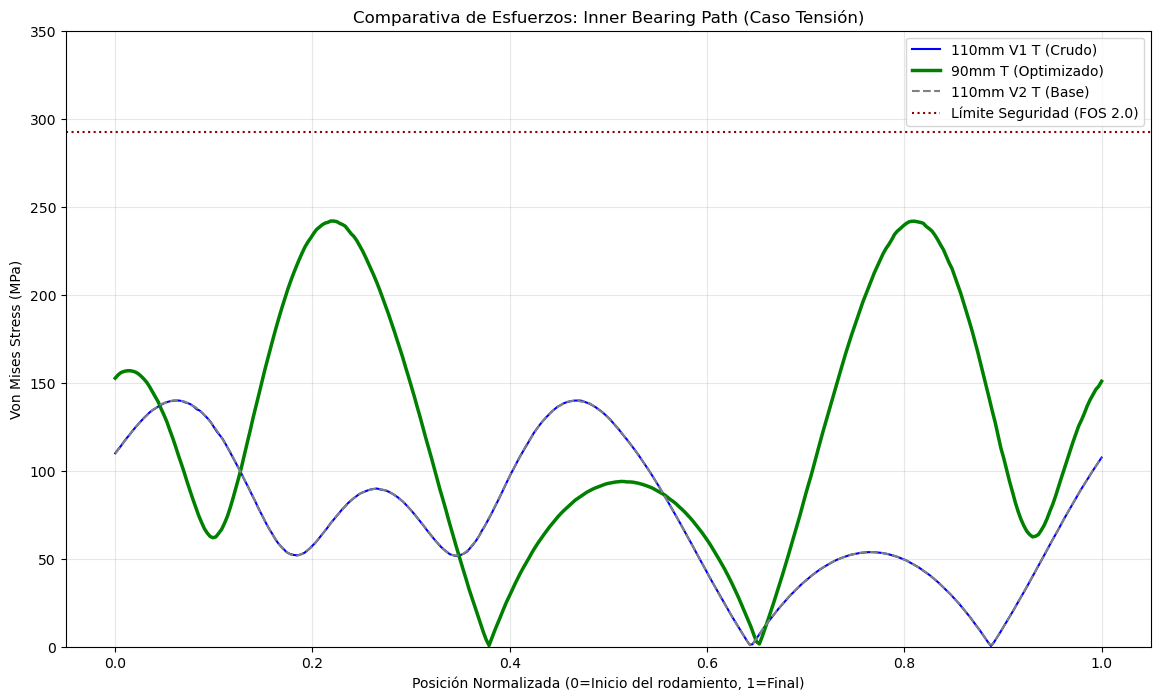

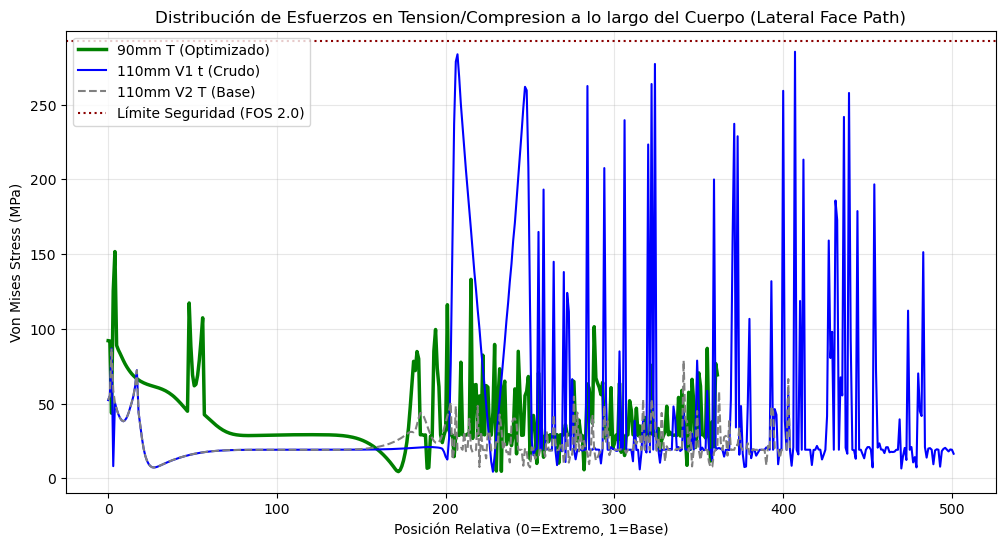

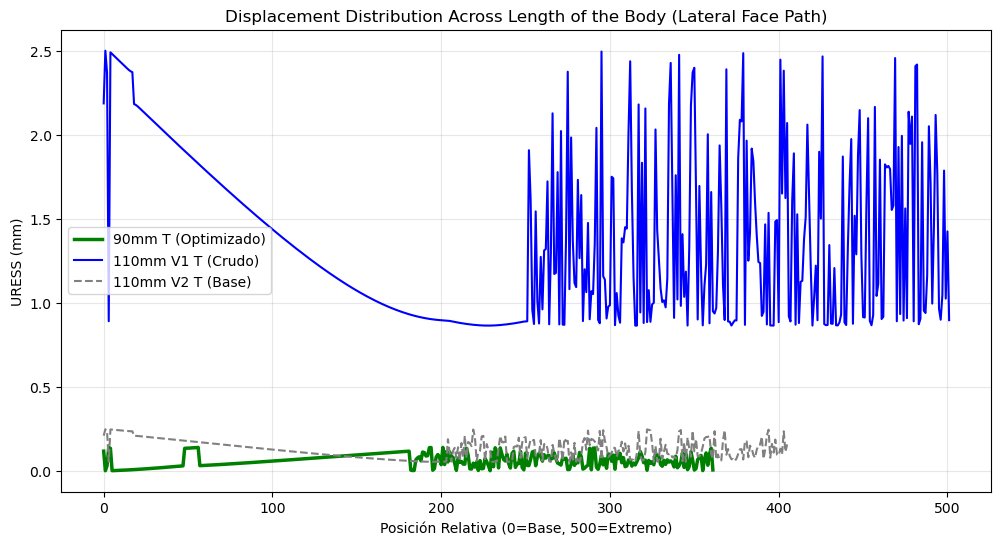

,Performance Metric,Modelo V1 (Base),Modelo 90 (Optimized),Improvement (%)
0,Max. Stress (MPa),574.9180,242.022000,57.9%
1,Total Mass Reduction (kg),0.0880,0.033000,62.5%
2,FOS min,1.0200,2.420000,137.3%
3,Displacement,2.5007,0.132545,94.7%


In [82]:
data_resumen = [
    {**summary_90t, 'Masa_kg': MASS_90, 'ID': '90mm_T'},
    {**summary_90c, 'Masa_kg': MASS_90, 'ID': '90mm_C'},
    {**summary_110V1t, 'Masa_kg': MASS_110V1, 'ID': '110mmV1_T'},
    {**summary_110V1c, 'Masa_kg': MASS_110V1, 'ID': '110mmV1_C'},
    {**summary_110V2t, 'Masa_kg': MASS_110V2, 'ID': '110mmV2_T'},
    {**summary_110V2c, 'Masa_kg': MASS_110V2, 'ID': '110mmV2_C'}
]

df_master = pd.DataFrame(data_resumen)

df_master['Eficiencia_FOS_kg'] = df_master['FOS_Min'] / df_master['Masa_kg']
print("MATRIZ DE DECISIÓN ESTRUCTURAL")
display(df_master[['ID', 'Max_Stress_MPa', 'FOS_Min', 'Masa_kg', 'Eficiencia_FOS_kg', 'Status']])

plt.figure(figsize=(14, 8))
plt.ylim(0, 350)

# Tension for 3 models Bearing


plt.plot(path_bearing_110V1t_von['Position'], path_bearing_110V1t_von['Value']/1e6, 
         label='110mm V1 T (Crudo)', color='blue')
plt.plot(path_bearing_90t_von['Position'], path_bearing_90t_von['Value']/1e6, 
        label='90mm T (Optimizado)', color='green', linewidth=2.5)
plt.plot(path_bearing_110V2t_von['Position'], path_bearing_110V2t_von['Value']/1e6, 
         label='110mm V2 T (Base)', color='gray', linestyle='--')


limite_seguro = (YIELD_STRENGTH / SAFETY_GOAL) / 1e6 
plt.axhline(y=limite_seguro, color='darkred', linestyle=':', label='Límite Seguridad (FOS 2.0)')

plt.title('Comparativa de Esfuerzos: Inner Bearing Path (Caso Tensión)')
plt.xlabel('Posición Normalizada (0=Inicio del rodamiento, 1=Final)')
plt.ylabel('Von Mises Stress (MPa)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('Comparativa de Esfuerzos.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# Tension/Compresion for 3 models Longitudinal force distribution

plt.figure(figsize=(12, 6))


plt.plot(lateral_face_90t_von['Position'], lateral_face_90t_von['Value']/1e6, 
         label='90mm T (Optimizado)', color='green', linewidth=2.5)
plt.plot(lateral_face_110V1t_von['Position'], lateral_face_110V1t_von['Value']/1e6, 
         label='110mm V1 t (Crudo)', color='blue')
plt.plot(lateral_face_110V2t_von['Position'], lateral_face_110V2t_von['Value']/1e6, 
         label='110mm V2 T (Base)', color='gray', linestyle='--')


plt.axhline(y=(YIELD_STRENGTH/2)/1e6, color='darkred', linestyle=':', label='Límite Seguridad (FOS 2.0)')

plt.title('Distribución de Esfuerzos en Tension/Compresion a lo largo del Cuerpo (Lateral Face Path)')
plt.xlabel('Posición Relativa (0=Extremo, 1=Base)')
plt.ylabel('Von Mises Stress (MPa)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('Distribución de Esfuerzos.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# Tension/Compresion for 3 models Longitudinal displacement distribution

plt.figure(figsize=(12, 6))


plt.plot(lateral_face_90t_disp['Position'], lateral_face_90t_disp['Value'], 
         label='90mm T (Optimizado)', color='green', linewidth=2.5)
plt.plot(lateral_face_110V1t_disp['Position'], lateral_face_110V1t_disp['Value'], 
         label='110mm V1 T (Crudo)', color='blue')
plt.plot(lateral_face_110V2t_disp['Position'], lateral_face_110V2t_disp['Value'], 
         label='110mm V2 T (Base)', color='gray', linestyle='--')


plt.title('Displacement Distribution Across Length of the Body (Lateral Face Path)')
plt.xlabel('Posición Relativa (0=Base, 500=Extremo)')
plt.ylabel('URESS (mm)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('Displacement Distribution.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()


#  Improvement Calculation (Optimized version vs Initial Version) 

# stress
upgrade_stress = ((summary_110V1t['Max_Stress_MPa'] - summary_90t['Max_Stress_MPa']) / summary_110V1t['Max_Stress_MPa']) * 100

# mass

upgrade_mass = ((MASS_110V1 - MASS_90) / MASS_110V1) * 100

# FOS
upgrade_fos = ((summary_90t['FOS_Min'] - summary_110V1t['FOS_Min']) / summary_110V1t['FOS_Min']) * 100

# Displacement
upgrade_displ = ((summary_110V1t['Max_Displ_mm'] - summary_90t['Max_Displ_mm']) / summary_110V1t['Max_Displ_mm']) * 100


upgrade_table = pd.DataFrame({
    'Performance Metric': ['Max. Stress (MPa)', 'Total Mass Reduction (kg)', 'FOS min', 'Displacement'],
    'Modelo V1 (Base)': [summary_110V1t['Max_Stress_MPa'], MASS_110V1, summary_110V1t['FOS_Min'], summary_110V1t['Max_Displ_mm']],
    'Modelo 90 (Optimized)': [summary_90t['Max_Stress_MPa'], MASS_90, summary_90t['FOS_Min'], summary_90t['Max_Displ_mm']],
    'Improvement (%)': [f"{upgrade_stress:.1f}%", f"{upgrade_mass:.1f}%", f"{upgrade_fos:.1f}%", f"{upgrade_displ:.1f}%"]
})

display(upgrade_table)



In [84]:

with pd.ExcelWriter('Analisis_Estructural_Direccion.xlsx') as writer:
    df_master.to_excel(writer, sheet_name='Matriz_Decision', index=False)
    upgrade_table.to_excel(writer, sheet_name='Cuantificacion_Mejoras', index=False)